# Task 1: Data Exploration

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


### Task 1.1

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

df = pd.read_csv('earthquakes.csv')

#I display the dataframe to get a sense of the format of the data
display(df)

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72667056,167.00,2.25,78.0,21.00,0.02659,"22km S of San Joaquin, California",36.406333,-120.207500,California,27,1.470000e+12,27/07/2016 12:54,12,54,7,54,2016
1,us20006i0y,30.00,4.90,371.0,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1.470000e+12,27/07/2016 00:20,0,20,7,28,2016
2,nc72666891,249.00,0.06,0.0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1.470000e+12,27/07/2016 00:31,0,31,7,37,2016
3,nc72666896,122.00,0.40,2.0,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1.470000e+12,27/07/2016 00:35,0,35,7,44,2016
4,nn00553447,113.61,0.30,1.0,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1.470000e+12,27/07/2016 00:41,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90.0,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1.470000e+12,25/08/2016 23:19,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30.0,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1.470000e+12,25/08/2016 23:19,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17.0,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1.470000e+12,25/08/2016 23:30,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37.0,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1.470000e+12,25/08/2016 23:36,23,36,8,11,2016


### Task 1.2

In [4]:
#First, I define a variable which calculates the mean impact magnitude
avg_mag = df["impact.magnitude"].mean()

#I create df1 which only contains the relevant data in df
df1 = df["impact.magnitude"]

#I define a variable which keeps track of the minimum difference throughout the dataframe. I assign the arbitrarily large number 1000
#I define a variable which keeps track of the row with the above mentioned minimum difference
#Next, I use a for loop to calculate the difference to the mean magnitude for each row in df1
min_diff = 1000
closest = None
for index in df1.index:
    diff = abs(avg_mag - df1[index])
    if diff < min_diff:
        min_diff = diff
        closest = index


#Results:
avg_mag
df.loc[closest,["location.full", "time.full", "impact.magnitude"]]

location.full       66km ENE of Old Faithful Geyser, Wyoming
time.full                                   28/07/2016 19:31
impact.magnitude                                        1.51
Name: 521, dtype: object

### Task 1.3

In [5]:
#First, I define a variable which takes the 5 largest values in a given column of a dataframe using the method .nlargest()
deepest_5 = df.nlargest(5, "location.depth")
#I use the parameters of the sort_values() method to specify the column and descending order
deepest_5.sort_values(by="location.depth", ascending=False)

display(deepest_5)

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
2068,us10006af2,103.0,4.5,312.0,622.13,6.191,Vanuatu region,-14.9295,172.3000,Vanuatu region,2,1.470000e+12,02/08/2016 17:39,17,39,8,1,2016
2267,us100069q5,37.0,4.5,312.0,611.84,3.146,"276km N of Ndoi Island, Fiji",-18.1535,-178.6700,Fiji,3,1.470000e+12,03/08/2016 09:21,9,21,8,3,2016
226,us100069i2,176.0,4.4,-297.0,599.55,8.139,South of the Fiji Islands,-25.9135,178.4949,South of the Fiji Islands,27,1.470000e+12,27/07/2016 20:36,20,36,7,42,2016
3109,us10006bsz,74.0,4.1,259.0,599.18,3.331,"289km N of Ndoi Island, Fiji",-18.0412,-178.4624,Fiji,5,1.470000e+12,05/08/2016 23:44,23,44,8,46,2016
4563,us10006cn4,178.0,4.3,284.0,583.34,3.038,"246km SE of Lambasa, Fiji",-17.7464,-178.7591,Fiji,10,1.470000e+12,10/08/2016 13:11,13,11,8,36,2016


# Task 2: Data Cleaning

### Task 2.1

In [6]:
#First, I check if there are any NaN values in the dataset with the method .isna(). This converts all the dataframe entries into Boolean values (Boolean mask).
#I compound this with the method .any() which checks if there are any True values for each of the 18 columns. This converts the dataframe into a single column dataframe with 18 rows, again filled with Boolean values.
#Sidenote: specifying the parameter axis=1 in the .any() method applies the method to each column instead of each row, which is useful as later we have to use the rows containing NaN to construct a new dataframe.
df_check_nan = df.isna().any(axis=1)
#I use  another .any(), which then checks if there are any True values in the one column left, thus yielding a single Boolean value. Since this yields the value True, we know that there is at least one NaN value present in the dataset.
df_check_nan.any()

#I now create a new dataframe from the rows containing NaN, using the same .isna() and .any() methods, as well as the previously defined df_check_nan
df_new = df.loc[df_check_nan,["impact.significance","location.depth","location.full"]]
display(df_new)

#I use the .dropna method to remove all entries with NaN values from the original dataframe.
df.dropna(inplace=True)
#When I display df, we see that it now contains 4 rows less. Thus we have been successful in removing the rows.
display(df)

,impact.significance,location.depth,location.full
8,NaN,0.18,"12km SE of Bodfish, CA"
10,NaN,13.85,"14km WNW of Anza, CA"
12,NaN,4.30,"14km S of Ridgemark, California"


,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72667056,167.00,2.25,78.0,21.00,0.02659,"22km S of San Joaquin, California",36.406333,-120.207500,California,27,1.470000e+12,27/07/2016 12:54,12,54,7,54,2016
1,us20006i0y,30.00,4.90,371.0,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1.470000e+12,27/07/2016 00:20,0,20,7,28,2016
2,nc72666891,249.00,0.06,0.0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1.470000e+12,27/07/2016 00:31,0,31,7,37,2016
3,nc72666896,122.00,0.40,2.0,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1.470000e+12,27/07/2016 00:35,0,35,7,44,2016
4,nn00553447,113.61,0.30,1.0,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1.470000e+12,27/07/2016 00:41,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90.0,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1.470000e+12,25/08/2016 23:19,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30.0,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1.470000e+12,25/08/2016 23:19,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17.0,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1.470000e+12,25/08/2016 23:30,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37.0,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1.470000e+12,25/08/2016 23:36,23,36,8,11,2016


### Task 2.2

In [8]:
#First, I used the .duplicated() method to assign a Boolean value to each row: True if it is a duplicate, False if it isn't.
#The .sum() method adds these values (True=1, False=0), and thus yields a count for how many duplicate rows there are.
duplicate_count = df.duplicated().sum()

#This line will display the duplicate row in df
identify_duplicate = df[df.duplicated]
display(identify_duplicate)

#Now, I remove the duplicates from the original dataset using the method .drop_duplicates(). We can check whether the code work by displaying df, which should now be shorter as the duplicate row was removed.
df = df.drop_duplicates()

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
134,nc72667056,167.0,2.25,78.0,21.0,0.02659,"22km S of San Joaquin, California",36.406333,-120.2075,California,27,1.470000e+12,27/07/2016 12:54,12,54,7,54,2016


### Task 2.3

In [9]:
#First, I define a duplicate dataframe
df2 = df.copy()

#Now, I randomly select 15 rows and replace entries from these rows in the 'impact.magnitude' column with a string. 
#Note that replace=False since I do not want to choose any rows twice.
random = np.random.choice(df2.index, size=15, replace=False)
df2.loc[random, "impact.magnitude"] = "string"

#Below, I check that my code above works.
#Namely, I display the 15 rows which now have string entries for 'impact magnitude'
non_ints = df.loc[df["impact.magnitude"].apply(lambda x: not isinstance(x, float))]
display(non_ints)

#I use the apply method to replace all string values in the column with the median magnitude. Though I wasn't very familiar with lambda functions, learninig about them proved useful as it allowed me to write the following code much more compactly.
df2["impact.magnitude"] = df2["impact.magnitude"].apply(lambda x: df["impact.magnitude"].median() if isinstance(x, str) else x)


,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year


### Task 2.4

In [12]:
#First, I define the two criteria for outliers below
upper_outlier = df["impact.significance"] > 1000.0
lower_outlier = df["impact.significance"] < 0.0

#New dataframe containing outliers and specified columns
outlier = df[upper_outlier | lower_outlier][["time.full", "location.full", "impact.magnitude", "impact.significance"]]

#Below, I assign the value 1000 or 0 to each outlier as per instructions
outlier.loc[lower_outlier, "impact.significance"] = 0.0
outlier.loc[upper_outlier, "impact.significance"] = 1000.0
display(outlier)

,time.full,location.full,impact.magnitude,impact.significance
28,27/07/2016 02:38,"7km NE of Little Lake, CA",1.13,0.0
32,27/07/2016 03:02,"6km NE of Little Lake, CA",0.28,0.0
60,27/07/2016 06:05,"72km ENE of Cape Yakataga, Alaska",0.90,0.0
88,27/07/2016 08:22,"83km ESE of Taron, Papua New Guinea",4.80,0.0
141,27/07/2016 13:30,"32km SE of Nikolski, Alaska",1.60,0.0
175,27/07/2016 16:51,"93km N of Redoubt Volcano, Alaska",1.00,1000.0
203,27/07/2016 19:27,"31km SSE of Sary-Tash, Kyrgyzstan",4.60,1000.0
226,27/07/2016 20:36,South of the Fiji Islands,4.40,0.0
268,27/07/2016 23:46,"17km WNW of Mountain View, Hawaii",1.54,0.0
321,28/07/2016 04:39,"92km NW of Nikiski, Alaska",1.70,0.0


### Task 2.5

In [10]:
#First, I define the two categories of earthquakes by magnitude
moderate = df["impact.magnitude"].between(5.0, 5.9)
strong = df["impact.magnitude"].between(6.0, 6.9)

#Next, I specify the columns which the two new dataframes should contain
moderate_df = df[moderate][["time.full", "impact.magnitude", "location.full", "location.latitude", "location.longitude"]]
strong_df = df[strong][["time.full", "impact.magnitude", "location.full", "location.latitude", "location.longitude"]]

display(moderate_df)
display(strong_df)

,time.full,impact.magnitude,location.full,location.latitude,location.longitude
30,27/07/2016 02:43,5.6,"155km SSE of San Pedro de Atacama, Chile",-24.2860,-67.8647
114,27/07/2016 10:47,5.3,"15km SE of Hitachi, Japan",36.4922,140.7568
421,28/07/2016 11:44,5.1,"163km SE of Hihifo, Tonga",-16.8242,-172.5158
632,29/07/2016 04:29,5.4,"40km SSE of Bilungala, Indonesia",0.0756,123.4162
641,29/07/2016 05:07,5.0,"176km NE of Flying Fish Cove, Christmas Island",-9.5253,107.0091
...,...,...,...,...,...
7872,23/08/2016 16:15,5.2,"39km SSE of Taron, Papua New Guinea",-4.8183,153.1178
7926,23/08/2016 22:33,5.5,"4km NE of Norcia, Italy",42.8223,13.1257
8029,24/08/2016 09:48,5.8,"176km WSW of Sungaipenuh, Indonesia",-2.9567,100.0549
8031,24/08/2016 10:18,5.0,"127km ESE of Tadine, New Caledonia",-22.0454,168.9981


,time.full,impact.magnitude,location.full,location.latitude,location.longitude
1554,01/08/2016 03:42,6.1,South Indian Ocean,-23.9619,82.4789
2682,04/08/2016 10:15,6.2,"53km NW of Abra Pampa, Argentina",-22.3942,-66.0814
2719,04/08/2016 12:24,6.3,"70km ENE of Iwo Jima, Japan",24.9477,142.0074
5030,11/08/2016 23:29,6.2,South of the Fiji Islands,-25.1394,-177.3386
7033,20/08/2016 05:01,6.0,"167km ENE of Miyako, Japan",40.3564,143.6799
7105,20/08/2016 11:58,6.0,"170km ENE of Miyako, Japan",40.2933,143.7539
7223,20/08/2016 23:45,6.4,South Georgia Island region,-55.2775,-31.7546
7863,23/08/2016 15:39,6.0,"132km N of Nebe, Indonesia",-7.2805,122.4255
7916,23/08/2016 21:36,6.2,"10km SE of Norcia, Italy",42.7140,13.1719
8002,24/08/2016 06:34,6.8,"25km W of Chauk, Burma",20.9192,94.5789


### Task 2.6

The methodology I would choose depends on the type of data that is missing, and hence what column the missing data is in.

I would replace missing value in the impact.gap or impact.magnitude columns with the mean of all the values in this column, since the entries are floats. In the impact.significance column, since the entries are integers, I could replace miissing values by the mean of the column rounded to the nearest whole number, or I could replace it with the median of the column. The benefit of the median is that it would already be an integer, and the median also does not get affected by the outliers in this column (<0 or >1000). The lines below shows how I would approach this, using the .fillna() method.

    mag_mean = df["impact.magnitude"].mean()
    df["impact.magnitude"].fillna(mag_mean, inplace=True)

A missing value in the 'location' columns could be replaced using some kind of database of locations. Namely, if only location.latitude and location.longitude, one can derive the remaining values for the location columns from this information (location.depth, location.name, etc.). Conversely, if only, for example, location.name is known, approximate coordinates can be used to fill in missing values for location.latitude and location.longitude. A database of information would be needed for this.

Similarly, for the 'time' columns, if time.full is known, the year, month, day, hour and minute can be extracted from this and used to fill in any missing values in other columns. Since every entry in time.full is exactly the same length, this could be done by using indexing. For example, if the third row of time.year was empty but time.full was filled in: 

    string = str(df.loc[2,"time.full"])
    df.loc[2,"time.year"] = int(string[6:10])
   
The simple code above would take the '2016' from '27/07/2016 00:35' and fill that into the box with the missing value in the 3rd row (which has index 2).


# Task 3: Data Manipulation

### Task 3.1

In [11]:
#For this task, I chose 5 countries/states, namely Alaska, California, Hawaii, Japan and Russia.
#For each of the countries, I calculate the mean, median, stdev for depth and magnitude and organize them into data, which I then convert into separate dataframes.
#For the calculation itself, I primarily relied on the .loc() method

#Alaska
data_alk = {
  "Mean Depth": [df.loc[df["location.name"] == "Alaska", ["location.depth"]].mean()],
  "Median Depth": [df.loc[df["location.name"] == "Alaska", ["location.depth"]].median()],
  "Standard Deviation of Depths": [df.loc[df["location.name"] == "Alaska", ["location.depth"]].std()],
  "Mean Magnitude": [float(df.loc[df["location.name"] == "Alaska", ["impact.magnitude"]].mean())],
  "Median Magnitude": [df.loc[df["location.name"] == "Alaska", ["impact.magnitude"]].median()],
  "Standard Deviation of Magnitudes": [df.loc[df["location.name"] == "Alaska", ["impact.magnitude"]].std()],
}

df_alk = pd.DataFrame(data_alk)

#California
data_ca = {
  "Mean Depth": [df.loc[df["location.name"] == "California", ["location.depth"]].mean()],
  "Median Depth": [df.loc[df["location.name"] == "California", ["location.depth"]].median()],
  "Standard Deviation of Depths": [df.loc[df["location.name"] == "California", ["location.depth"]].std()],
  "Mean Magnitude": [float(df.loc[df["location.name"] == "California", ["impact.magnitude"]].mean())],
  "Median Magnitude": [df.loc[df["location.name"] == "California", ["impact.magnitude"]].median()],
  "Standard Deviation of Magnitudes": [df.loc[df["location.name"] == "California", ["impact.magnitude"]].std()],
}

df_ca = pd.DataFrame(data_ca)

#Hawaii
data_hwi = {
  "Mean Depth": [df.loc[df["location.name"] == "Hawaii", ["location.depth"]].mean()],
  "Median Depth": [df.loc[df["location.name"] == "Hawaii", ["location.depth"]].median()],
  "Standard Deviation of Depths": [df.loc[df["location.name"] == "Hawaii", ["location.depth"]].std()],
  "Mean Magnitude": [df.loc[df["location.name"] == "Hawaii", ["impact.magnitude"]].mean()],
  "Median Magnitude": [df.loc[df["location.name"] == "Hawaii", ["impact.magnitude"]].median()],
  "Standard Deviation of Magnitudes": [df.loc[df["location.name"] == "Hawaii", ["impact.magnitude"]].std()],
}

df_hwi = pd.DataFrame(data_hwi)

#Japan
data_jpn = {
  "Mean Depth": [df.loc[df["location.name"] == "Japan", ["location.depth"]].mean()],
  "Median Depth": [df.loc[df["location.name"] == "Japan", ["location.depth"]].median()],
  "Standard Deviation of Depths": [df.loc[df["location.name"] == "Japan", ["location.depth"]].std()],
  "Mean Magnitude": [df.loc[df["location.name"] == "Japan", ["impact.magnitude"]].mean()],
  "Median Magnitude": [df.loc[df["location.name"] == "Japan", ["impact.magnitude"]].median()],
  "Standard Deviation of Magnitudes": [df.loc[df["location.name"] == "Japan", ["impact.magnitude"]].std()],
}

df_jpn = pd.DataFrame(data_jpn)

#Russia
data_ru = {
  "Mean Depth": [df.loc[df["location.name"] == "California", ["location.depth"]].mean()],
  "Median Depth": [df.loc[df["location.name"] == "California", ["location.depth"]].median()],
  "Standard Deviation of Depths": [df.loc[df["location.name"] == "California", ["location.depth"]].std()],
  "Mean Magnitude": [df.loc[df["location.name"] == "California", ["impact.magnitude"]].mean()],
  "Median Magnitude": [df.loc[df["location.name"] == "California", ["impact.magnitude"]].median()],
  "Standard Deviation of Magnitudes": [df.loc[df["location.name"] == "California", ["impact.magnitude"]].std()],
}

df_ru = pd.DataFrame(data_ru)

#Resulting separate dataframes:
print("Alaska:")
display(df_alk)
print("California:")
display(df_ca)
print("Hawaii:")
display(df_hwi)
print("Japan:")
display(df_jpn)
print("Russia:")
display(df_ru)

Alaska:


,Mean Depth,Median Depth,Standard Deviation of Depths,Mean Magnitude,Median Magnitude,Standard Deviation of Magnitudes
0,location.depth 36.914579 dtype: float64,location.depth 18.4 dtype: float64,location.depth 39.388633 dtype: float64,1.552164,impact.magnitude 1.5 dtype: float64,impact.magnitude 0.659299 dtype: float64


California:


,Mean Depth,Median Depth,Standard Deviation of Depths,Mean Magnitude,Median Magnitude,Standard Deviation of Magnitudes
0,location.depth 6.150141 dtype: float64,location.depth 5.02 dtype: float64,location.depth 4.81361 dtype: float64,1.008286,impact.magnitude 0.91 dtype: float64,impact.magnitude 0.591729 dtype: float64


Hawaii:


,Mean Depth,Median Depth,Standard Deviation of Depths,Mean Magnitude,Median Magnitude,Standard Deviation of Magnitudes
0,location.depth 13.36432 dtype: float64,location.depth 3.832 dtype: float64,location.depth 15.447882 dtype: float64,impact.magnitude 1.6676 dtype: float64,impact.magnitude 1.78 dtype: float64,impact.magnitude 0.668378 dtype: float64


Japan:


,Mean Depth,Median Depth,Standard Deviation of Depths,Mean Magnitude,Median Magnitude,Standard Deviation of Magnitudes
0,location.depth 83.9455 dtype: float64,location.depth 34.04 dtype: float64,location.depth 130.091102 dtype: float64,impact.magnitude 4.815 dtype: float64,impact.magnitude 4.7 dtype: float64,impact.magnitude 0.527476 dtype: float64


Russia:


,Mean Depth,Median Depth,Standard Deviation of Depths,Mean Magnitude,Median Magnitude,Standard Deviation of Magnitudes
0,location.depth 6.150141 dtype: float64,location.depth 5.02 dtype: float64,location.depth 4.81361 dtype: float64,impact.magnitude 1.008286 dtype: float64,impact.magnitude 0.91 dtype: float64,impact.magnitude 0.591729 dtype: float64


### Task 3.2

In [12]:
countries = ["Alaska", "California", "Hawaii", "Japan", "Russia"]

def function(string):
    filtered_earthquakes = df[(df["location.name"] == string) & (df["impact.magnitude"] >= 2.0)].copy()
    frequency = len(filtered_earthquakes)/30
    filtered_earthquakes["time.full"] = pd.to_datetime(filtered_earthquakes['time.full'], format='%d/%m/%Y %H:%M')
    period = filtered_earthquakes["time.full"].diff().mean()
    average_period_between_earthquakes = period.total_seconds() / (frequency-1)
    return str("The mean frequency of earthquakes in " + string + " is " + str(frequency) + " earthquakes per day, and the mean period between earthquakes is " + str(period))

for i in range(5):
    print(function(countries[i]))


The mean frequency of earthquakes in Alaska is 16.4 earthquakes per day, and the mean period between earthquakes is 0 days 01:27:21.262729124
The mean frequency of earthquakes in California is 6.966666666666667 earthquakes per day, and the mean period between earthquakes is 0 days 03:23:46.442307692
The mean frequency of earthquakes in Hawaii is 2.066666666666667 earthquakes per day, and the mean period between earthquakes is 0 days 11:39:23.606557377
The mean frequency of earthquakes in Japan is 1.3333333333333333 earthquakes per day, and the mean period between earthquakes is 0 days 16:48:04.615384615
The mean frequency of earthquakes in Russia is 0.9 earthquakes per day, and the mean period between earthquakes is 1 days 01:12:48.461538461


### Task 3.3

In [13]:
#Combined for all 5 countries/states
data_cmb = {
  "Mean Depth": [df.loc[df["location.name"].isin(countries), ["location.depth"]].mean()],
  "Median Depth": [df.loc[df["location.name"].isin(countries), ["location.depth"]].median()],
  "Standard Deviation of Depths": [df.loc[df["location.name"].isin(countries), ["location.depth"]].std()],
  "Mean Magnitude": [df.loc[df["location.name"].isin(countries), ["impact.magnitude"]].mean()],
  "Median Magnitude": [df.loc[df["location.name"].isin(countries), ["impact.magnitude"]].median()],
  "Standard Deviation of Magnitudes": [df.loc[df["location.name"].isin(countries), ["impact.magnitude"]].std()],
}
df_cmb = pd.DataFrame(data_cmb)

dataframes = [df_alk, df_ca, df_hwi, df_jpn, df_ru, df_cmb]
df_3_3 = pd.concat(dataframes)

display(df_3_3)

,Mean Depth,Median Depth,Standard Deviation of Depths,Mean Magnitude,Median Magnitude,Standard Deviation of Magnitudes
0,location.depth 36.914579 dtype: float64,location.depth 18.4 dtype: float64,location.depth 39.388633 dtype: float64,1.552164,impact.magnitude 1.5 dtype: float64,impact.magnitude 0.659299 dtype: float64
0,location.depth 6.150141 dtype: float64,location.depth 5.02 dtype: float64,location.depth 4.81361 dtype: float64,1.008286,impact.magnitude 0.91 dtype: float64,impact.magnitude 0.591729 dtype: float64
0,location.depth 13.36432 dtype: float64,location.depth 3.832 dtype: float64,location.depth 15.447882 dtype: float64,impact.magnitude 1.6676 dtype: float64,impact.magnitude 1.78 dtype: float64,impact.magnitude 0.668378 dtype: float64
0,location.depth 83.9455 dtype: float64,location.depth 34.04 dtype: float64,location.depth 130.091102 dtype: float64,impact.magnitude 4.815 dtype: float64,impact.magnitude 4.7 dtype: float64,impact.magnitude 0.527476 dtype: float64
0,location.depth 6.150141 dtype: float64,location.depth 5.02 dtype: float64,location.depth 4.81361 dtype: float64,impact.magnitude 1.008286 dtype: float64,impact.magnitude 0.91 dtype: float64,impact.magnitude 0.591729 dtype: float64
0,location.depth 18.366604 dtype: float64,location.depth 7.8 dtype: float64,location.depth 31.472765 dtype: float64,impact.magnitude 1.269251 dtype: float64,impact.magnitude 1.17 dtype: float64,impact.magnitude 0.766595 dtype: float64


# Task 4: Data Visualization

### Task 4.1

Specified time period: 27/07/2016 - 03/08/2016
Key: Alaska = 1, Japan = 2, California = 3


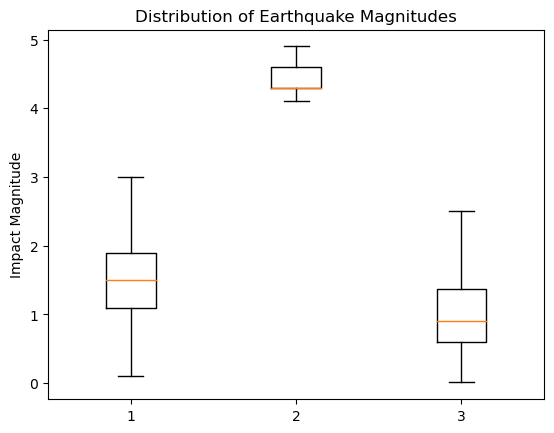

In [14]:
df4 = df

df4["time.full"] = pd.to_datetime(df4['time.full'], format='%d/%m/%Y %H:%M')
df4 = df4.loc[(df4["time.full"]>"2016-07-27 00:00") & (df4["time.full"] < "2016-08-03 00:00")]

df_alaska = df4.loc[df4["location.name"] == "Alaska", ["impact.magnitude"]]
df_japan = df4.loc[df4["location.name"] == "Japan", ["impact.magnitude"]]
df_cali = df4.loc[df4["location.name"] == "California", ["impact.magnitude"]]

list_alaska = df_alaska["impact.magnitude"].tolist()
list_japan = df_japan["impact.magnitude"].tolist()
list_cali = df_cali["impact.magnitude"].tolist()


data = [list_alaska, list_japan, list_cali]
plt.boxplot(data, showfliers = False)
print("Specified time period: 27/07/2016 - 03/08/2016")
print("Key: Alaska = 1, Japan = 2, California = 3")
plt.ylabel("Impact Magnitude")
plt.title("Distribution of Earthquake Magnitudes")
plt.show()

### Task 4.2

Text(0.5, 1.0, 'Mean Impact Magnitude in Selected Regions')

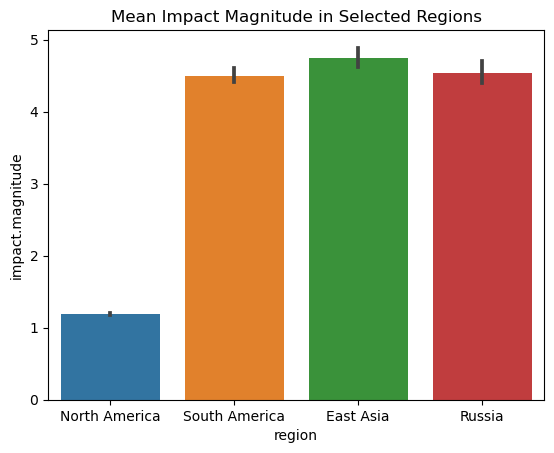

In [15]:
df_4_2 = df.copy()
#Since I chose to deal with larger regions in this task, I assign various countries a region name, such as North America or East Asia. 
#These regions will serve as the x-axis in my bar chart
country_region = {
    "Canada": "North America",
    "California": "North America",
    "Alaska": "North America",
    "Oklahoma": "North America",
    "Hawaii": "North America",
    "Nevada": "North America",
    "Washington": "North America",
    "Wyoming": "North America",
    "Tennessee": "North America",
    "Russia": "Russia",
    "Japan": "East Asia",
    "China": "East Asia",
    "Chile": "South America",
    "Peru": "South America",
    "Argentina": "South America",
    "Brazil": "South America",
    "Colombia": "South America",
    "Guayana": "South America",
    "Guatemala": "South America"
}

df_4_2["region"] = df_4_2['location.name'].map(country_region)

#Finally, I plotted the bar chart using seaborn and matplotlib
sns.barplot(x="region", y="impact.magnitude", data=df_4_2)
plt.title("Mean Impact Magnitude in Selected Regions")

### Task 4.3

In [17]:
#For the creation of the scatterplot, I use the plotly express library which was imported at the very beginning.
df_4_3 = df[["location.name","impact.magnitude"]]

scatterplt = px.scatter(df_4_3, x="location.name", y="impact.magnitude")
scatterplt.write_html("scatterplot.html")

scatterplt.show()

### Task 4.4

/tmp/ipykernel_172/3898547265.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



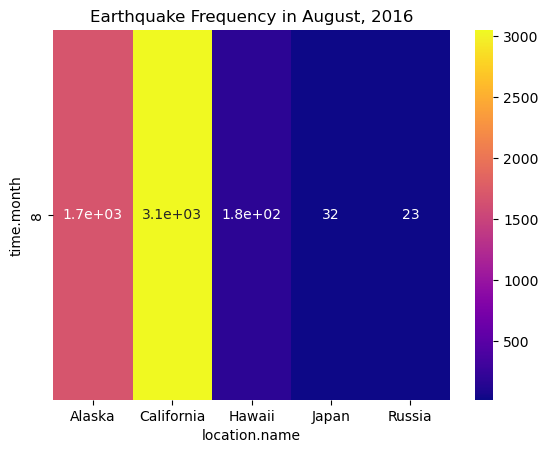

In [18]:
df4_4 = df.copy()
# First, I converted the "time.full" column to datetime, and filtered df_4 to be strictly in August
df4_4['time.full'] = pd.to_datetime(df4_4['time.full'], format='%d/%m/%Y %H:%M')
df4_4 = df4_4[(df4_4["time.full"] > "2016-08-01 00:00") & (df4_4["time.full"] < "2016-08-31 00:00")]
# Next, I specified the relevant countries using the previously defined list countries (Alaska, California, Hawaii, Japan, Russia)
countries_df = df4_4[df4_4["location.name"].isin(countries)]
countries_df['time.month'] = countries_df['time.full'].dt.month

# I created a heatmap table using the .pivot_table(), which is needed to then plot the actual heatmap
heatmap_data = countries_df.pivot_table(index="time.month", columns="location.name", values="impact.magnitude", aggfunc='count')

# Finally, I plotted the heatmap using seaborn and matplotlib, which I imported at the very start.
sns.heatmap(heatmap_data, annot=True, cmap='plasma')
plt.title("Earthquake Frequency in August, 2016")
plt.show()


### Task 4.5: Unfinished

In [64]:
#world_map = folium.Map(location =[0,0], zoom_start = 1)

#frequency = df4_4["location.name"].value_counts()

#folium.Choropleth(
    
#Unfortunately I was not able to finish this task.

# Task 5

Abstract

   This paper summarises and interprets the main findings and implications from my analysis of global earthquake data from 2016. This summary is intended to serve as a springboard for informed decision-making by policymakers in countries affected by earthquakes, and most heavily features analysis on data from Alaska, Hawaii, California, Japan and Russia.
   Understanding the geographic conditions of a region enables engineers to construct safer and more resilient structures while still optimising resources. It also allows governments to make informed budgeting and spending decisions, so that earthquake countermeasures and aid policies are effective. Overall, the analysis of this earthquake data has direct implications for public safety, disaster management, and urban planning, and is thus highly relevant for policy-makers in countries where earthquakes are a relevant issue.

Conclusions

1. The average earthquake in North America is less than a third of the magnitude of the average earthquake in East Asia, South America, or Russia. Of these regions, East Asia had the strongest average earthquake.
2. Alaska, California, Hawaii, Japan, and Russia were analysed in greater depth. Of these 5 areas, Japan experienced the strongest earthquakes, with a mean magnitude of 4.82 out of 9.
3. The 5 deepest and 5 shallowest earthquakes both occurred in Fiji and the Vanuatu region.
4. No recorded earthquake exceeded a magnitude of 6.9 in this dataset. The five strongest earthquakes occurred in Burma, Italy, Indonesia, Japan, and the South Georgia Islands.
5. When visualised on a world map (which I unfortunately wasn't able to complete), the majority of the earthquakes align with the edges of tectonic plates (Evers).

Further Interpretation

   Earthquakes most commonly occur on the edge of tectonic plates as this is where subduction and friction between plates most frequently occurs, causing waves and/or volcanic eruptions. The edge of the Pacific plate in particular holds the epithet the ‘Ring of Fire’ due to the frequent occurrence of earthquakes (Evers). Specifically, Japan, Fiji and the Vanuatu archipelago lie almost precisely on the Ring of Fire. This information helps explain Conclusions 2 and 3.
   Policymakers should note not just the average frequency and magnitude of earthquakes in their country, but the depth too: the further underground an earthquake occurs, the more energy it loses before it reaches the surface, thus ultimately resulting in less damage. Policymakers should further acknowledge the standard deviations for values such as impact magnitude or location depth, as a low standard deviation suggests more consistent data, and vice versa. For example, the boxplot not only shows that Japan has a high mean earthquake magnitude, but shows a narrow spread of data. More consistent data makes for more reliable justification for potential policies.
   
Assumptions
   
   Note that the methodology of the data analysis followed precise instructions and thus holds certain assumptions. For example, there are a myriad of ways in which data could be polluted; the data cleaning process (task 2) assumed that our data was only polluted with NaN values, duplicate rows, and outliers.
   An assumption of the data analysis process is also the validity and completeness of the data itself. Firstly, I did not examine the credibility of the source. Furthermore, the type of technology use to obtain the data is key: directly measuring seismic activity with a seismograph/seismometer is highly accurate, but this advanced technology is not uniformly available around the world, and thus perhaps some parts of the world with greater economic resources would have more/better data. On the other hand, if satellites were used to record seismic activity, this would result in a more complete coverage of global earthquake data, at the cost of being far less accurate.
  
Shortcomings and Next Steps

   A shortcoming of this analysis is the short timeframe of the data. While a spatial analysis was conducted and visualised through maps and plots in Task 4, a temporal analysis is also extremely valuable information. Had the dataset spanned more than just a month, one could draw conclusions about earthquake density during different times of the year, which could help make connections to other phenomena such as seasons, weather patterns, fluctuations in the Earth's gravitational field, or human activity (assuming these variables were recorded as additional columns in the dataset).
   Due to the absence of unit labels, the meaning of some columns is vague. It is simple to deduce that 'impact magnitude' is measured on the Richter scale, or that ‘location depth’ is measured in kilometres below the surface. However, the ‘impact significance’ of an earthquake can be measured in more than one way, yet there is no indication of what methodology was used to determine the values in this column.
   Finally, this analysis, like all analyses of large datasets, treads the fine line between being too specific and too general. While broader conclusions about regions such as North America are easier to communicate and use (see bar chart), the earthquake patterns in California and, for example, North Dakota, differ vastly— and an earthquake report which deals with North America as an aggregate region is almost useless to a policy-maker in either state. Over-generalizing results diminishes their precision, yet overly specific data, as in the original ‘earthquakes.csv’ file, is unintelligible and thus also not useful. Any successful data analysis must strike a balance between these two extremes.



                                            Works Cited

Evers, Jeannie. “Plate Tectonics and the Ring of Fire.” National Geographic, education.nationalgeographic.org/resource/plate-tectonics-ring-fire/. Accessed 17 Dec. 2023.